#### **Exercise 1:**

Last week, we started looking at the Titanic data.  Load that data again. For features that you think are of minimal importance and / or have too many NAs to make imputation feasible, drop those features.  For those that seem important, use a `SimpleImputer` to impute the data.

In [6]:
import pandas as pd
from sklearn.impute import SimpleImputer
titanic_columns = ['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'survived']
titanic_df = pd.read_csv('titanic.csv', usecols=titanic_columns)
titanic_df.drop(['name', 'ticket', 'cabin'], axis=1, inplace=True)
age_imputer = SimpleImputer(strategy='median')
titanic_df['age'] = age_imputer.fit_transform(titanic_df[['age']])
embarked_imputer = SimpleImputer(strategy='most_frequent')
titanic_df['embarked'] = embarked_imputer.fit_transform(titanic_df[['embarked']]).ravel()  # Use ravel() to flatten the array
print(titanic_df.head())


   pclass     sex      age  sibsp  parch      fare embarked  survived
0       1  female  29.0000      0      0  211.3375        S         1
1       1    male   0.9167      1      2  151.5500        S         1
2       1  female   2.0000      1      2  151.5500        S         0
3       1    male  30.0000      1      2  151.5500        S         0
4       1  female  25.0000      1      2  151.5500        S         0


#### **Exercise 2**

Sklearn does not handle strings.  Use an encoder to transform any string columns into numbers. If there are any categorical columns where label encoding won't work, use a one-hot encoder.

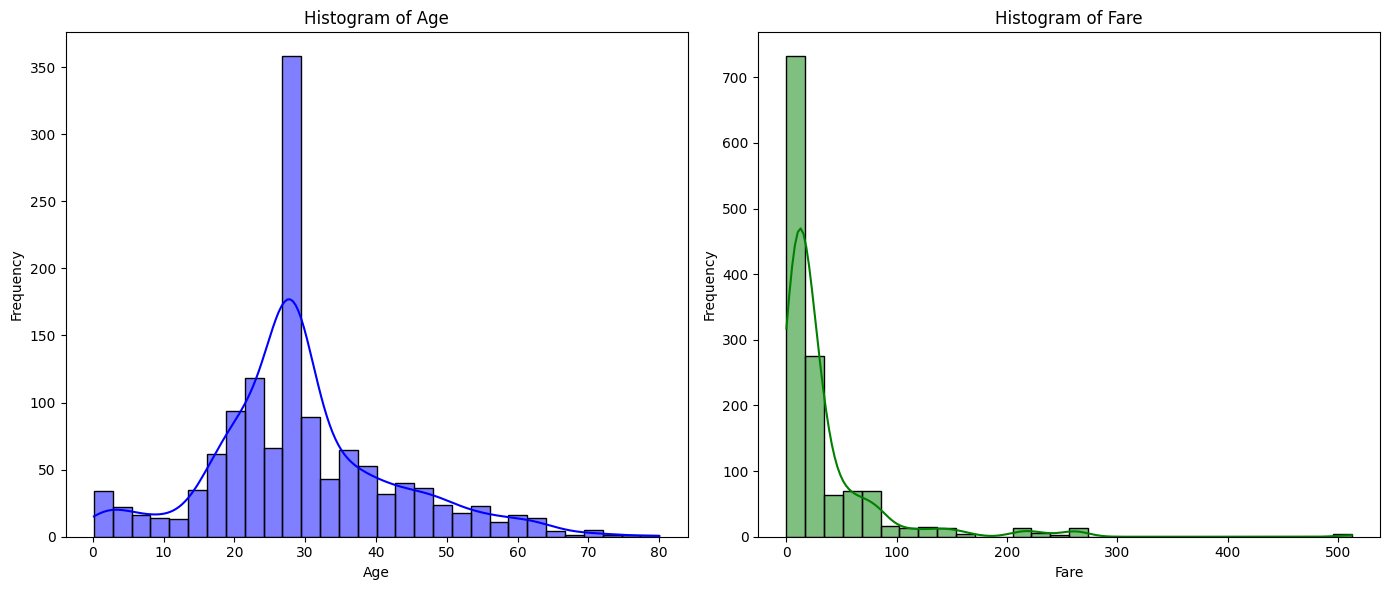

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
titanic_columns = ['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'survived']
titanic_df = pd.read_csv('titanic.csv', usecols=titanic_columns)
titanic_df.drop(['name', 'ticket', 'cabin'], axis=1, inplace=True)
label_encoder = LabelEncoder()
titanic_df['sex'] = label_encoder.fit_transform(titanic_df['sex'])
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')
embarked_encoded = one_hot_encoder.fit_transform(titanic_df[['embarked']])
embarked_encoded_df = pd.DataFrame(embarked_encoded, columns=one_hot_encoder.get_feature_names_out(['embarked']))
titanic_df = pd.concat([titanic_df, embarked_encoded_df], axis=1).drop('embarked', axis=1)
age_fare_imputer = SimpleImputer(strategy='median')
titanic_df[['age', 'fare']] = age_fare_imputer.fit_transform(titanic_df[['age', 'fare']])
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(titanic_df['age'], kde=True, bins=30, color='blue')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
sns.histplot(titanic_df['fare'], kde=True, bins=30, color='green')
plt.title('Histogram of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#### **Exercise 3**

Using 5-fold cross-validation, examine the performance of a LogisticRegression classifier. 

In [9]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
titanic_columns = ['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'survived']
titanic_df = pd.read_csv('titanic.csv', usecols=titanic_columns)
titanic_df.drop(['name', 'ticket', 'cabin'], axis=1, inplace=True)
label_encoder = LabelEncoder()
titanic_df['sex'] = label_encoder.fit_transform(titanic_df['sex'])
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')
embarked_encoded = one_hot_encoder.fit_transform(titanic_df[['embarked']])
embarked_encoded_df = pd.DataFrame(embarked_encoded, columns=one_hot_encoder.get_feature_names_out(['embarked']))
titanic_df = pd.concat([titanic_df, embarked_encoded_df], axis=1).drop('embarked', axis=1)
age_fare_imputer = SimpleImputer(strategy='median')
titanic_df[['age', 'fare']] = age_fare_imputer.fit_transform(titanic_df[['age', 'fare']])
X = titanic_df.drop('survived', axis=1)
y = titanic_df['survived']
logistic_regression_model = LogisticRegression(max_iter=1000)  # Increased max_iter to ensure convergence
cv_scores = cross_val_score(logistic_regression_model, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", cv_scores.mean())


Cross-Validation Accuracy Scores: [0.53816794 0.85114504 0.81679389 0.72519084 0.67049808]
Mean Cross-Validation Accuracy: 0.7203591588429703


#### **Exercise 4**

Replace the logistic regression classifier with a decision tree classifier.  Which works better?  Why do you think that is?

In [10]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
titanic_columns = ['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'survived']
titanic_df = pd.read_csv('titanic.csv', usecols=titanic_columns)
titanic_df.drop(['name', 'ticket', 'cabin'], axis=1, inplace=True)
label_encoder = LabelEncoder()
titanic_df['sex'] = label_encoder.fit_transform(titanic_df['sex'])
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')
embarked_encoded = one_hot_encoder.fit_transform(titanic_df[['embarked']])
embarked_encoded_df = pd.DataFrame(embarked_encoded, columns=one_hot_encoder.get_feature_names_out(['embarked']))
titanic_df = pd.concat([titanic_df, embarked_encoded_df], axis=1).drop('embarked', axis=1)
age_fare_imputer = SimpleImputer(strategy='median')
titanic_df[['age', 'fare']] = age_fare_imputer.fit_transform(titanic_df[['age', 'fare']])
X = titanic_df.drop('survived', axis=1)
y = titanic_df['survived']
from sklearn.linear_model import LogisticRegression
logistic_regression_model = LogisticRegression(max_iter=1000)
cv_scores_logistic = cross_val_score(logistic_regression_model, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores for Logistic Regression:", cv_scores_logistic)
print("Mean Cross-Validation Accuracy for Logistic Regression:", cv_scores_logistic.mean())
decision_tree_model = DecisionTreeClassifier()
cv_scores_dt = cross_val_score(decision_tree_model, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores for Decision Tree:", cv_scores_dt)
print("Mean Cross-Validation Accuracy for Decision Tree:", cv_scores_dt.mean())

Cross-Validation Accuracy Scores for Logistic Regression: [0.53816794 0.85114504 0.81679389 0.72519084 0.67049808]
Mean Cross-Validation Accuracy for Logistic Regression: 0.7203591588429703
Cross-Validation Accuracy Scores for Decision Tree: [0.49236641 0.7519084  0.64122137 0.67938931 0.68582375]
Mean Cross-Validation Accuracy for Decision Tree: 0.6501418501944956


#### **Exercise 5:** 

See if you can get the decision tree classifier to perform better by adjusting your imputation procedure to use a KNNImputer.

In [12]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
titanic_columns = ['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'survived']
titanic_df = pd.read_csv('titanic.csv', usecols=titanic_columns)
titanic_df.drop(['name', 'ticket', 'cabin'], axis=1, inplace=True)
label_encoder = LabelEncoder()
titanic_df['sex'] = label_encoder.fit_transform(titanic_df['sex'])
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')
embarked_encoded = one_hot_encoder.fit_transform(titanic_df[['embarked']])
embarked_encoded_df = pd.DataFrame(embarked_encoded, columns=one_hot_encoder.get_feature_names_out(['embarked']))
titanic_df = pd.concat([titanic_df, embarked_encoded_df], axis=1).drop('embarked', axis=1)
knn_imputer = KNNImputer(n_neighbors=5)
titanic_df[['age', 'fare']] = knn_imputer.fit_transform(titanic_df[['age', 'fare']])
X = titanic_df.drop('survived', axis=1)
y = titanic_df['survived']
decision_tree_model = DecisionTreeClassifier()
cv_scores_dt = cross_val_score(decision_tree_model, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores for Decision Tree with KNNImputer:", cv_scores_dt)
print("Mean Cross-Validation Accuracy for Decision Tree with KNNImputer:", cv_scores_dt.mean())

Cross-Validation Accuracy Scores for Decision Tree with KNNImputer: [0.47709924 0.76335878 0.6259542  0.69083969 0.67049808]
Mean Cross-Validation Accuracy for Decision Tree with KNNImputer: 0.645549998537627


#### **Exercise 6:**

Try using a `GridSearchCV` to optimize the DecisionTree algorithm.  What is the best performance you can achieve?

In [13]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
titanic_columns = ['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'survived']
titanic_df = pd.read_csv('titanic.csv', usecols=titanic_columns)
titanic_df.drop(['name', 'ticket', 'cabin'], axis=1, inplace=True)
label_encoder = LabelEncoder()
titanic_df['sex'] = label_encoder.fit_transform(titanic_df['sex'])
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')
embarked_encoded = one_hot_encoder.fit_transform(titanic_df[['embarked']])
embarked_encoded_df = pd.DataFrame(embarked_encoded, columns=one_hot_encoder.get_feature_names_out(['embarked']))
titanic_df = pd.concat([titanic_df, embarked_encoded_df], axis=1).drop('embarked', axis=1)
knn_imputer = KNNImputer(n_neighbors=5)
titanic_df[['age', 'fare']] = knn_imputer.fit_transform(titanic_df[['age', 'fare']])
X = titanic_df.drop('survived', axis=1)
y = titanic_df['survived']
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X, y)
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)
best_model = grid_search.best_estimator_
cv_scores_best = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores for the Best Model:", cv_scores_best)
print("Mean Cross-Validation Accuracy for the Best Model:", cv_scores_best.mean())

0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
1440.40s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
1440.59s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
1440.80s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debug

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Cross-Validation Accuracy: 0.6936269778596706
Cross-Validation Accuracy Scores for the Best Model: [0.50381679 0.79770992 0.8129771  0.69083969 0.651341  ]
Mean Cross-Validation Accuracy for the Best Model: 0.6913369015237928
